# Метод стрельбы для задачи XI.9.2 б)

## Условие

$y'' + \dfrac{y'^2}{2-y} = 0, 0 < x \leq 1$

$y(0) = y_0$, $y(1) = 0$

$y_0 = 0,25; 0,5; 1; 1,5; 1,8; 1,9; 1,95$

Приведём систему к нормальному виду заменой z(x) = y'(x)

\begin{equation}
    \begin{cases}
      y' = z,\\
      z' = -\dfrac{z^2}{2-y},\\
	    y(0) = y_0,\\
      y(1) = 0
    \end{cases}
\end{equation}

## Решение методом стрельбы

Поставим новую задачу для метода стрельбы

$z(0) = \alpha$

Решим новую задачу Коши:

\begin{equation}
    \begin{cases}
      y' = z,\\
      z' = -\dfrac{z^2}{2-y},\\
	    y(0) = y_0,\\
      z(0) = \alpha
    \end{cases}
\end{equation}

Также составим задачу Коши для нахождения $F'(\alpha)$

\begin{equation}
    \begin{cases}
      u' = v,\\
      v' = -\dfrac{z^2}{(y-2)^2}*u + 2\dfrac{z}{y-2}*v,\\
	    u(0) = 0,\\
      v(0) = 1
    \end{cases}
\end{equation}

### Импорт библиотек и объявление глобальных переменных

In [85]:
import numpy as np
import matplotlib.pyplot as plt

STEP = 0.01

### Объявление функций

In [86]:
def f0(x, y):
    return y[1]

def f1(x, y):
    return -y[1]**2/(2-y[0])

def func_f(x, y):
    return np.array([f0(x, y), f1(x, y)])

def v0(v, x, y):
    return v[1]

def v1(v, x, y):
    return -(y[1]**2)/((y[0]-2)**2)*v[0]+2*y[1]/(y[0]-2)*v[1]

def func_v(v, x, y):
    return np.array([v0(v, x, y), v1(v, x, y)])

### Определения МРК 3-го порядка

In [87]:
# МРК 3-го порядка для первой задачи Коши
def delta_y_kuta_first(x, y):
	k1 = func_f(x, y)*STEP
	k2 = func_f(x + STEP/2, y + k1/2)*STEP
	k3 = func_f(x + STEP, y - k1 + 2*k2)*STEP
	return (k1 + 4*k2 + k3)/6

# МРК 3-го порядка для второй задачи Коши
def delta_y_kuta_second(v, x, y):
	k1 = func_v(v, x, y)*STEP
	k2 = func_v(v + k1/2, x, y)*STEP
	k3 = func_v(v - k1 + 2*k2, x, y)*STEP
	return (k1 + 4*k2 + k3)/6

In [88]:
def NewtonMethod(alpha, y0):
    x = np.arange(0, 1, STEP)
    size = np.shape(x)[0]
    y = np.zeros((int(size), 2))
    y[0] = np.array([y0, alpha])

    v = np.zeros((int(size), 2))
    v[0] = np.array([0, 1])

    for i in range(1, size):
        y[i] = y[i-1] + delta_y_kuta_first(x[i-1], y[i-1])
        v[i] = v[i-1] + delta_y_kuta_second(v[i-1], x[i-1], y[i-1])

    Func = y[-1, 0]
    FuncDerive = v[-1, 0]
    return alpha - Func/FuncDerive, x, y[:, 0]

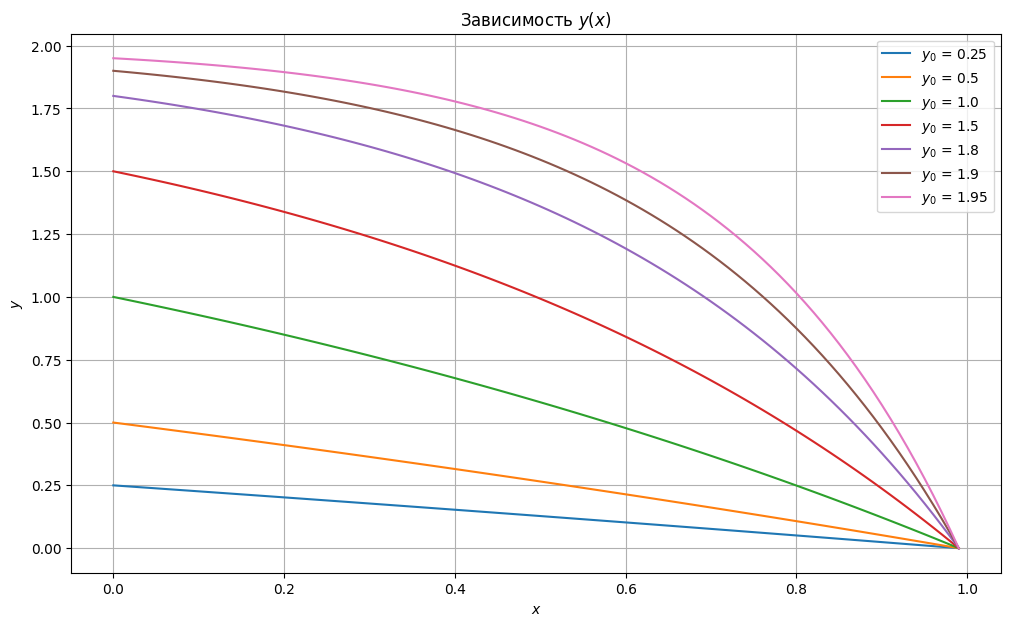

In [89]:
alpha = 1
list_y0 = np.array([0.25, 0.5, 1, 1.5, 1.8, 1.9, 1.95])

fig = plt.figure(figsize=[12, 7])
plt.title('Зависимость $y(x)$')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()

for item in list_y0:
    while(1):
        next_alpha, x, sol = NewtonMethod(alpha, item)
        if(np.abs(next_alpha - alpha) < 1e-5):
            break
        alpha = next_alpha
    plt.plot(x, sol, '-', label=str('$y_0$ = ' + str(item)))

plt.legend()